### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Миронов Дмитрий Андреевич
##### Группа:   НПИбд-02-21

## Москва 2024
***



### Вариант №9





1.	Загрузите diamonds набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая независимую features/carat и зависимую features/y
переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

ds = tfds.load("diamonds", split='train')
ds

<_PrefetchDataset element_spec={'features': {'carat': TensorSpec(shape=(), dtype=tf.float32, name=None), 'clarity': TensorSpec(shape=(), dtype=tf.int64, name=None), 'color': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cut': TensorSpec(shape=(), dtype=tf.int64, name=None), 'depth': TensorSpec(shape=(), dtype=tf.float32, name=None), 'table': TensorSpec(shape=(), dtype=tf.float32, name=None), 'x': TensorSpec(shape=(), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(), dtype=tf.float32, name=None), 'z': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'price': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

Преобразуем PrefetchDataset в DataFrame:

In [ ]:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

ds = tfds.load("diamonds", split='train')
ds
df = tfds.as_dataframe(ds)
df.head()
df = df[['features/y','features/carat','features/depth','features/x','features/z']]
df = df.dropna()
print(df.head())

   features/y  features/carat  features/depth  features/x  features/z
0        7.00            1.26       60.599998        6.97        4.23
1        5.99            0.80       62.099998        5.96        3.71
2        5.32            0.56       61.700001        5.28        3.27
3        7.27            1.51       64.000000        7.24        4.64
4        4.45            0.33       62.200001        4.43        2.76


Вычисляем матрицу корреляции признаков и выведем названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.

In [ ]:
correlation_df = df.corr()
print(correlation_df)

# замена диагональные 1 на NaN
np.fill_diagonal(correlation_df.values, np.nan)
# матрица в столбец
stack_corr = correlation_df.stack()
sort_corr = stack_corr.sort_values()
max = sort_corr.tail(1).index[0]
min = sort_corr.head(1).index[0]
print(f"Набиольшее: {max}")
print(f"Наименьшая: {min}")

                features/y  features/carat  features/depth  features/x  \
features/y        1.000000        0.951722       -0.029341    0.974701   
features/carat    0.951722        1.000000        0.028224    0.975094   
features/depth   -0.029341        0.028224        1.000000   -0.025289   
features/x        0.974701        0.975094       -0.025289    1.000000   
features/z        0.952006        0.953387        0.094924    0.970772   

                features/z  
features/y        0.952006  
features/carat    0.953387  
features/depth    0.094924  
features/x        0.970772  
features/z        1.000000  
Набиольшее: ('features/x', 'features/carat')
Наименьшая: ('features/y', 'features/depth')


2. Выполните визуализацию независимой (эмпирическая плотность  распределения) и зависимой переменных (столбчатая диаграмма), подписывая оси и рисунок.

Text(0, 0.5, 'Плотность')

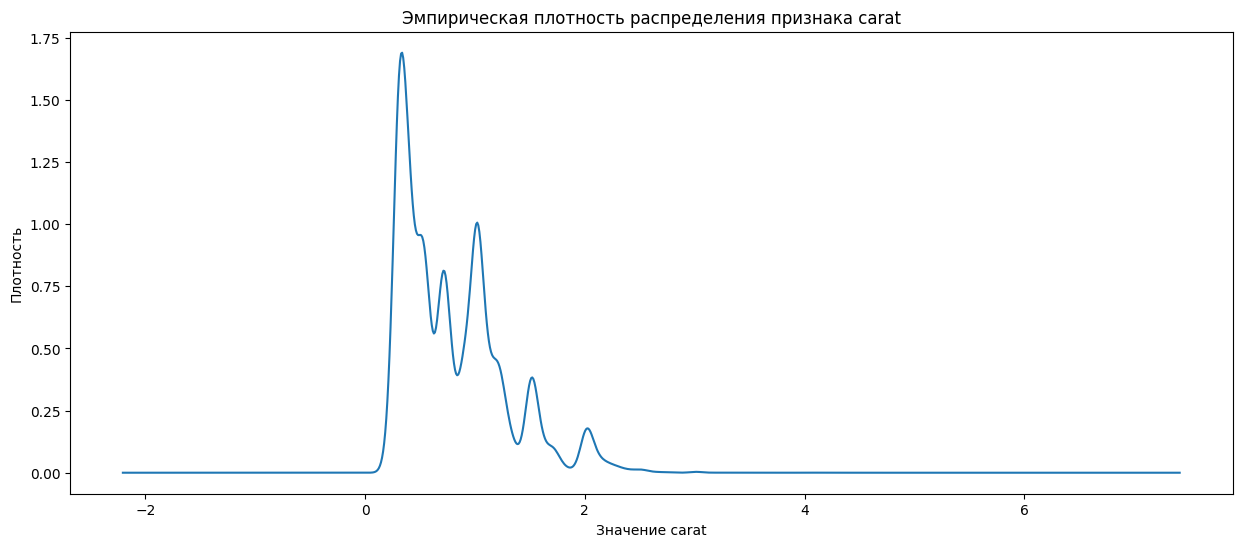

In [ ]:
import tensorflow_datasets as tfds

ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)
df.head()

# Создание графика эмпирической плотности распределения для признака 'carat'
ax = df['features/carat'].plot.density(title='Эмпирическая плотность распределения признака carat', figsize=(15, 6))
ax.set_xlabel('Значение carat')
ax.set_ylabel('Плотность')

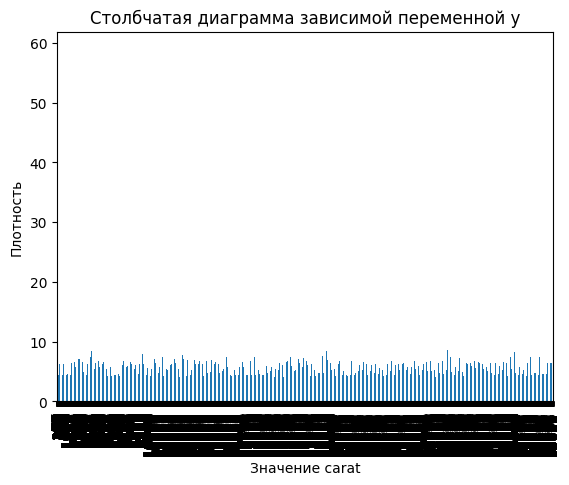

In [ ]:
import tensorflow_datasets as tfds

ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)
df.head()

# Создание графика эмпирической плотности распределения для признака 'carat'
ax = df['features/y'].plot.bar(title='Столбчатая диаграмма зависимой переменной y')
ax.set_xlabel('Значение carat')
ax.set_ylabel('Плотность')
plt.show()

3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.

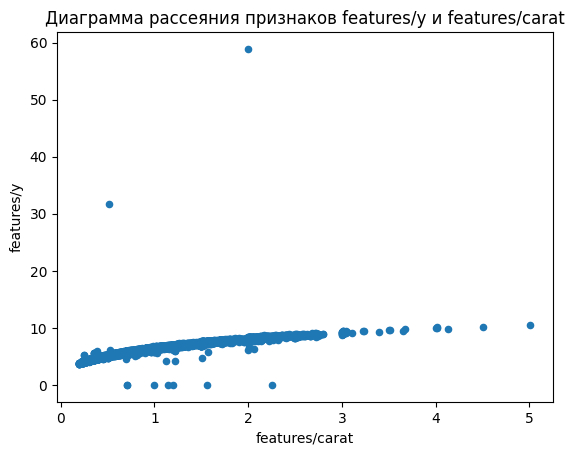

In [ ]:
df.plot.scatter('features/carat','features/y',title='Диаграмма рассеяния \
признаков features/y и features/carat');

На диаграмме есть отдельно стоящие точки, их нужно убрать. При необходимости меняем пороговое значение (std_limit).

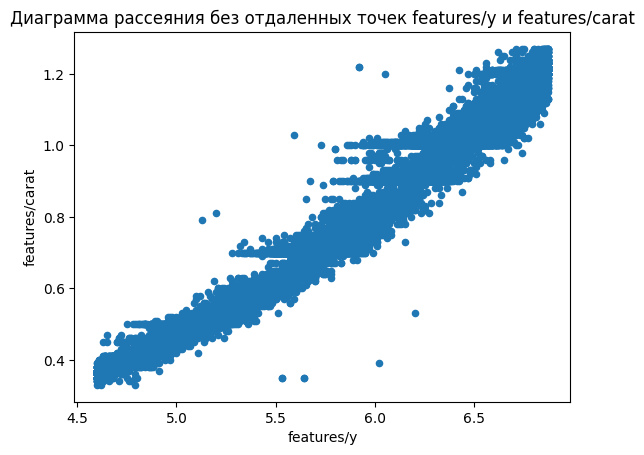

In [ ]:
std_limit = 1
mean_t = df['features/y'].mean()
std_t = df['features/y'].std()
mean_tu = df['features/carat'].mean()
std_tu = df['features/carat'].std()

filter_df = df[
    (np.abs(df['features/y'] - mean_t) < std_limit * std_t) &
    (np.abs(df['features/carat'] - mean_tu) < std_limit * std_tu)
]

filter_df.plot.scatter('features/y','features/carat',title='Диаграмма рассеяния \
без отдаленных точек features/y и features/carat');

4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества  R2  (коэффициенту детерминации).

In [ ]:
class SimpleLinearRegression:

    def __init__(self):
        self.coefficient_ = None
        self.intercept_ = None

    def fit(self, x, y):
        assert x.ndim == 1, \
            "There should be only one feature in the data"
        assert len(x) == len(y), \
            "Data should have the same size"

        x_mean = np.mean(x)
        y_mean = np.mean(y)

        self.coefficient_ = (x - x_mean).dot(y - y_mean) / \
                            (x - x_mean).dot(x - x_mean)
        self.intercept_ = y_mean - self.coefficient_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "There should be only one feature in the data"
        assert self.coefficient_ is not None and self.intercept_ is not None, \
            "The model must be trained first"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.coefficient_ * x_single + self.intercept_

    def __repr__(self):
        return "SimpleLinearRegression()"

Очистим набор от точек, расположенных вдоль верхней границы графика при помощи булева индексирования:

In [ ]:
x = df['features/carat']
y = df['features/y']
print(x.shape, y.shape)

x = x[y < np.max(y)]
y = y[y < np.max(y)]
print(x.shape, y.shape)

(53940,) (53940,)
(53939,) (53939,)


Изобразим на графике точки независимого и зависимого признаков и линию регрессии:

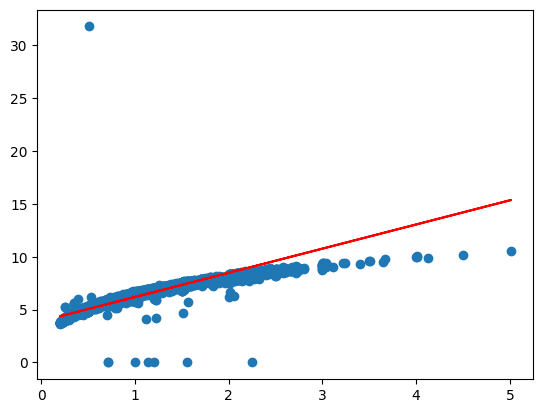

In [ ]:
reg = SimpleLinearRegression()
reg.fit(x, y)
y_predict = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r');

Cоздадим модель простейшей нейронной сети из одного слоя с одним нейроном. В качестве функции потерь и для оценки качества модели используем среднюю квадратичную ошибка MAE:

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
)
model.fit(x, y, epochs=100, verbose=0)

Вычислим коэффициент детерминации для двух подходов:

In [ ]:
y_predict2 = model.predict(x)
Q1 = np.sum((y - y_predict) ** 2)
Q2 = np.sum((y - y_predict2.flatten()) ** 2)
y_mean = np.mean(y)
S0 = np.sum((y - y_mean) ** 2)

r_squared1 = 1 - (Q1 / S0)
r_squared2 = 1 - (Q2 / S0)

print("R^2 для точной линии регрессии:", r_squared1)
print("R^2 для линии регрессии (ANN):", r_squared2)

1686/1686 [==============================] - 2s 1ms/step
R^2 для точной линии регрессии: 0.9394623223655483
R^2 для линии регрессии (ANN): 0.91001807898283


Из полученных данных можно сделать вывод, что точный подход чуть лучше

5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.

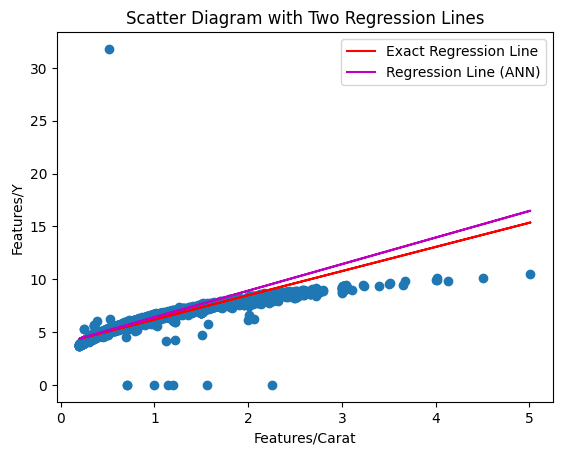

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_predict, c='r', label='Exact Regression Line')
plt.plot(x, y_predict2, c='m', label='Regression Line (ANN)')
plt.title('Scatter Diagram with Two Regression Lines')
plt.xlabel('Features/Carat')
plt.ylabel('Features/Y')
plt.legend()
plt.show()

6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака features/y ). Нормализуйте зависимый признак features/y.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

x_train = train_data.drop(columns=['features/y']).values
y_train = train_data['features/y'].values
x_test = test_data.drop(columns=['features/y']).values
y_test = test_data['features/y'].values

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(x_train))

y_train_s = (y_train - y_train.mean()) / y_train.std()

7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:
линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
Выберите коэффициенты регуляризации l1 и l2 так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки уменьшалось в процессе обучения).

Линейная регрессия

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])


linear_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_line = linear_model.fit(
    np.array(x_train), y_train_s,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [ ]:
hist_line = pd.DataFrame(history_line.history)
hist_line['epoch'] = history_line.epoch
hist_line.tail()

,loss,val_loss,epoch
95,0.330909,0.082643,95
96,0.251428,0.228071,96
97,1.226382,0.142174,97
98,0.494133,0.025158,98
99,0.209263,0.040964,99


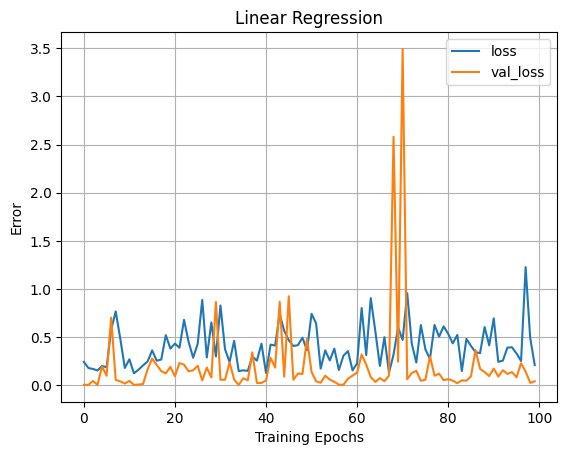

In [ ]:
def plot_loss(history, title):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Training Epochs')
  plt.ylabel('Error')
  plt.title(title)
  plt.legend()
  plt.grid(True)

plot_loss(history_line, 'Linear Regression')


Лассо регрессия (L1)

In [ ]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

l1_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_l1 = l1_model.fit(
    x_train, y_train_s,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [ ]:
hist_l1 = pd.DataFrame(history_l1.history)
hist_l1['epoch'] = history_l1.epoch
hist_l1.tail()

,loss,val_loss,epoch
95,0.195158,0.237437,95
96,0.399399,0.075791,96
97,0.496637,0.063668,97
98,0.115072,0.014219,98
99,0.283788,0.730196,99


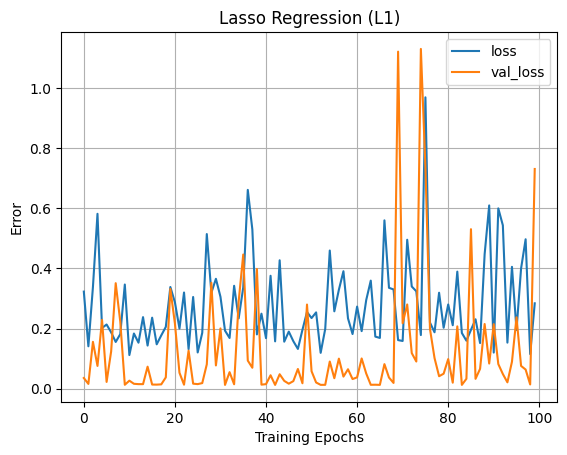

In [ ]:
plot_loss(history_l1, 'Lasso Regression (L1)')

Гребневая регрессия (L2)

In [ ]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

l2_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
)

history_l2 = l2_model.fit(
    x_train, y_train_s,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [ ]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,val_loss,epoch
95,0.145511,0.010157,95
96,0.211548,0.568280,96
97,0.340040,0.017426,97
98,0.137544,0.009666,98
99,0.446742,0.161015,99


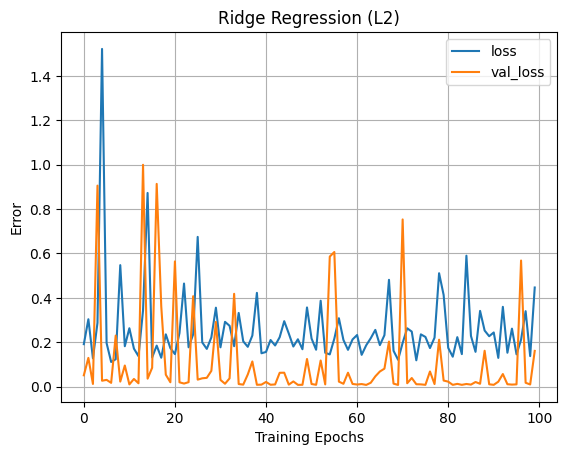

In [ ]:
plot_loss(history_l2, 'Ridge Regression (L2)')

8. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [ ]:
from sklearn.metrics import mean_absolute_error

linpred = linear_model.predict(x_test)
l1pred = l1_model.predict(x_test)
l2pred = l2_model.predict(x_test)

mae_test_line = mean_absolute_error(y_test, linpred)
mae_test_l1 = mean_absolute_error(y_test, l1pred)
mae_test_l2 = mean_absolute_error(y_test, l2pred)

print(f"Linear: {mae_test_line}\nL1: {mae_test_l1}\nL2: {mae_test_l2}")

338/338 [==============================] - 0s 1ms/step
Linear: 5.761607646942139
L1: 5.327323913574219
L2: 5.741343975067139


По метрике MAE лучшая модель - Лассо

9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

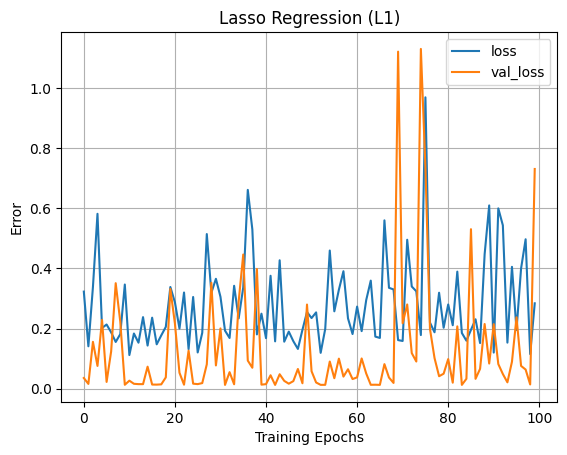

In [ ]:
plot_loss(history_l1, 'Lasso Regression (L1)')